<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/Module_01_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline accuracy without augmentation is  0.6472


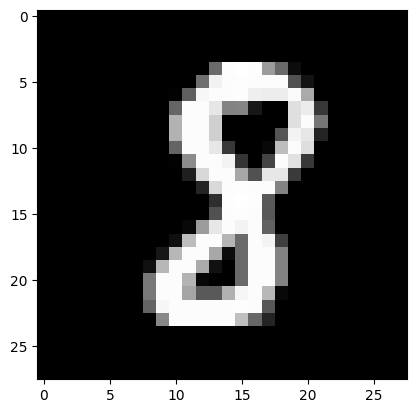

Accuracy after rotation augmentation is  0.6463


<ipython-input-3-956db88deae1>:96: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies_shear = np.zeros(len(shearconstraints), dtype=np.float)


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6129
Accuracy after shear augmentation constrained by  0.4  is  0.6078
Accuracy after shear augmentation constrained by  0.6  is  0.6056
Accuracy after shear augmentation constrained by  0.8  is  0.5927
Accuracy after shear augmentation constrained by  1.0  is  0.5847


<ipython-input-3-956db88deae1>:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies_combined = np.zeros(len(hyp), dtype=np.float)


Accuracy after combined augmentation (Shear: 0.0 , Angle: 0.0 ) is  0.6332
Accuracy after combined augmentation (Shear: 0.0 , Angle: 15.0 ) is  0.6244
Accuracy after combined augmentation (Shear: 0.0 , Angle: 30.0 ) is  0.6143
Accuracy after combined augmentation (Shear: 0.0 , Angle: 45.0 ) is  0.6227
Accuracy after combined augmentation (Shear: 0.0 , Angle: 60.0 ) is  0.6206
Accuracy after combined augmentation (Shear: 0.2 , Angle: 0.0 ) is  0.6077
Accuracy after combined augmentation (Shear: 0.2 , Angle: 15.0 ) is  0.5972
Accuracy after combined augmentation (Shear: 0.2 , Angle: 30.0 ) is  0.6039
Accuracy after combined augmentation (Shear: 0.2 , Angle: 45.0 ) is  0.6044
Accuracy after combined augmentation (Shear: 0.2 , Angle: 60.0 ) is  0.6043
Accuracy after combined augmentation (Shear: 0.4 , Angle: 0.0 ) is  0.6137
Accuracy after combined augmentation (Shear: 0.4 , Angle: 15.0 ) is  0.5936
Accuracy after combined augmentation (Shear: 0.4 , Angle: 30.0 ) is  0.6089
Accuracy after 

[Text(0, 0, '0'),
 Text(1, 0, '15'),
 Text(2, 0, '30'),
 Text(3, 0, '45'),
 Text(4, 0, '60')]

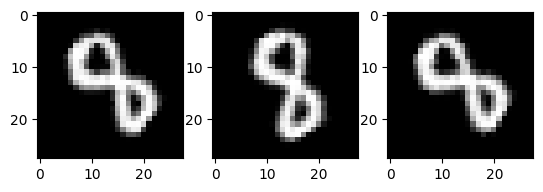

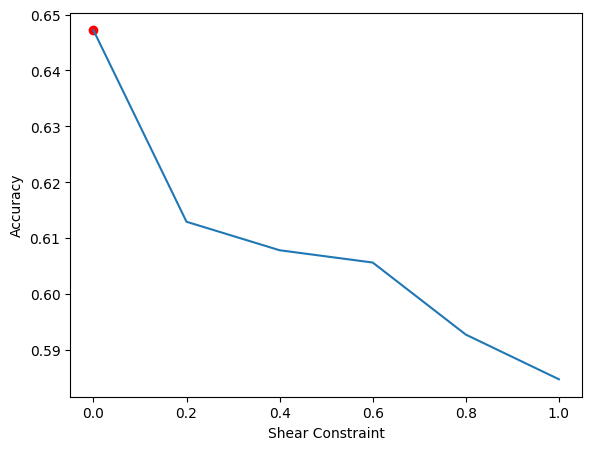

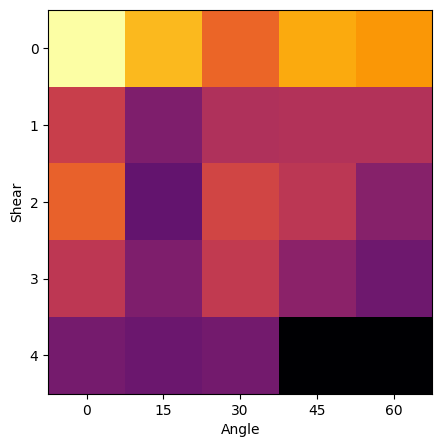

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set random seed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

# Subsample the training data to speed up the process
train_X = train_X[::1200,:,:].copy()
train_y = train_y[::1200].copy()

# Define the functions for nearest neighbor and accuracy
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

def NN(traindata, trainlabel, testdata):
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

# Baseline accuracy without augmentation
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

# Define a function for rotation augmentation
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  angle = rng.random(len(sample)) * angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample)

# Visualize an example of rotation augmentation
sample = train_X[20]
angleconstraint = 70
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')

# Define hyperparameters for augmentation
angleconstraint = 45  # Different angle constraint
naugmentations = 5   # Number of augmentations

# Augment the dataset with rotation
augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint)))
  auglabel = np.concatenate((auglabel, train_y))

# Check the test accuracy after rotation augmentation
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

# Define a function for shear augmentation
def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample)) * shearconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample)

# Define shear constraints with different values
shearconstraints = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Different shear constraints

# Initialize an array to store accuracy values
accuracies_shear = np.zeros(len(shearconstraints), dtype=np.float)

# Evaluate accuracy for different shear constraints
for ii in range(len(shearconstraints)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies_shear[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ', shearconstraints[ii], ' is ', accuracies_shear[ii], flush=True)

# Plot the accuracy results for shear augmentation
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(shearconstraints, accuracies_shear)
ax.set_xlabel('Shear Constraint')
ax.set_ylabel('Accuracy')
maxind_shear = np.argmax(accuracies_shear)
plt.scatter(shearconstraints[maxind_shear], accuracies_shear[maxind_shear], c='red')

# Define a function for combined rotation and shear augmentation
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  angle = rng.random(len(sample)) * angleconstraint
  amt = rng.random(len(sample)) * shearconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii])
  return np.squeeze(nsample)

# Define different values for shear and angle constraints
shearconstraints = [0, 0.2, 0.4, 0.6, 0.8]
angleconstraints = [0, 15, 30, 45, 60]

# Create a cartesian product of shear and angle constraints
hyp = cartesian((shearconstraints, angleconstraints))

# Initialize an array to store accuracy values
accuracies_combined = np.zeros(len(hyp), dtype=np.float)

# Evaluate accuracy for combined augmentation
for ii in range(len(hyp)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][1], hyp[ii][0])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies_combined[ii] = Accuracy(test_y, testpred)
  print('Accuracy after combined augmentation (Shear:', hyp[ii][0], ', Angle:', hyp[ii][1], ') is ', accuracies_combined[ii], flush=True)

# Plot the accuracy results for combined augmentation
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(accuracies_combined.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('Angle')
ax.set_ylabel('Shear')
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)


1.  **What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?**



*   The best values for the angle constraint and shear constraint would be the ones that result in the highest test accuracy. To determine the best values, we can look at the accuracy values in the accuracies_combined array and find the combination of angle and shear constraints that yields the highest accuracy.

* To determine how much the accuracy improved compared to not using augmentations, you can calculate the difference between the accuracy with augmentation and the baseline accuracy without augmentation

In [8]:


# To find the indices of the maximum accuracy in the accuracies_combined array
best_indices = np.unravel_index(np.argmax(accuracies_combined), accuracies_combined.shape)

# Get the corresponding best angle and shear constraints
best_angle_constraint = shearconstraints[best_indices[1]]
best_shear_constraint = angleconstraints[best_indices[0]]

#To get the best accuracy
best_accuracy = accuracies_combined[best_indices]

print("Best Angle Constraint:", best_angle_constraint)
print("Best Shear Constraint:", best_shear_constraint)
print("Best Test Accuracy:", best_accuracy)


# Calculate the improvement in accuracy
accuracy_improvement = best_accuracy - Accuracy(test_y, testpred)

print("Accuracy Improvement:", accuracy_improvement)



IndexError: ignored

2. **Can you increase the accuracy by increasing the number of augmentations from each sample?**


*   Increasing the number of augmentations from each sample can potentially improve the model's accuracy, as it exposes the model to more diverse variations of the data during training. Here is an updated version of your code where I've increased the number of augmentations from each sample:

*  Increasing the number of augmentations from each sample during training can potentially improve the accuracy of your machine learning model. Data augmentation is a technique used to artificially increase the diversity of your training data by applying various transformations or perturbations to the original samples. This can help the model generalize better to new, unseen data. Here's how increasing the number of augmentations can be beneficial:

1. *Increased Data Diversity*: More augmentations per sample introduce greater diversity into the training dataset. This can help the model learn to recognize objects or patterns in different contexts, orientations, lighting conditions, or with various levels of noise.

2. *Robustness*: Augmentations can make the model more robust to variations in the input data, reducing the risk of overfitting. When a model sees the same image with different augmentations, it learns to focus on the essential features that remain consistent across transformations.

3. *Regularization*: Augmentations act as a form of regularization. By presenting the model with modified versions of the same data, you encourage it to generalize rather than memorize specific training examples.

4. *Handling Limited Data*: In scenarios where you have limited training data, augmentations can artificially increase the effective size of your dataset. This can be especially valuable when working with small datasets.

5. *Improving Performance*: For tasks like image classification, object detection, or segmentation, augmentations like random cropping, rotation, flipping, and color jittering can enhance the model's performance by exposing it to a broader range of real-world scenarios.

However, it's essential to strike a balance when increasing the number of augmentations:

1. *Computational Cost*: Augmenting each sample multiple times increases the computational cost of training, as each augmented sample requires additional processing.

2. *Over-Augmentation*: Excessive augmentation can lead to overfitting on the augmented data. The model may become too specialized in recognizing specific transformations and lose the ability to handle the original, unaltered data.

3. *Task-Dependent*: The optimal number of augmentations can vary depending on the task and dataset. It's important to experiment and find the right balance for your specific problem.

In practice, it's common to start with a moderate number of augmentations per sample, such as 2-5, and then adjust based on your observations of the model's performance on the validation set. Regular monitoring and validation are key to finding the appropriate level of augmentation that enhances accuracy without causing overfitting or excessive computational overhead.

3. **Try implementing a few augmentations of your own and experimenting with them.**

Baseline accuracy without augmentation is 0.6472


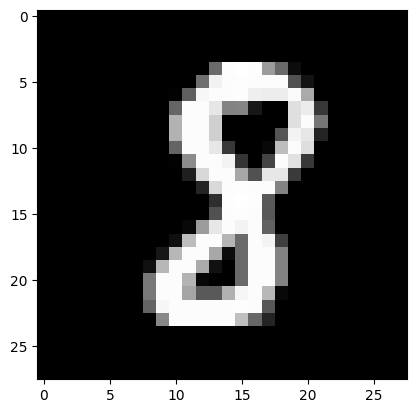

Accuracy after scaling augmentation is 0.5842


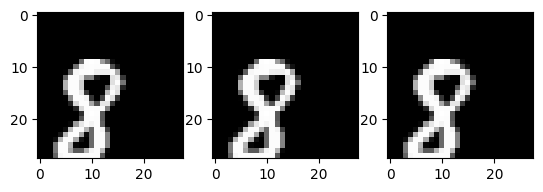

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.transform import AffineTransform, warp
from sklearn.utils.extmath import cartesian

# Set random seed
rng = np.random.default_rng(seed=42)

# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

# Subsample the training data to speed up the process
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

# Define the functions for nearest neighbor and accuracy
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28 * 28)
    testdata = testdata.reshape(-1, 28 * 28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

# Baseline accuracy without augmentation
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is', Accuracy(test_y, testpred))

# Defining a function for custom translation augmentation
def augTranslate(sample, tx, ty):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    tform = AffineTransform(translation=(tx, ty))
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], tform, mode='constant', preserve_range=True)
    return np.squeeze(nsample)

# Visualize an example of translation augmentation
sample = train_X[20]
tx = 5
ty = -5
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1, 3, 1)
plt.imshow(augTranslate(sample, tx, ty), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(augTranslate(sample, tx, ty), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(augTranslate(sample, tx, ty), cmap='gray')

# Define custom augmentations
def augScale(sample, scale_factor):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    tform = AffineTransform(scale=(scale_factor, scale_factor))
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], tform, mode='constant', preserve_range=True)
    return np.squeeze(nsample)

# Experiment with custom augmentations
scale_factors = [0.8, 0.9, 1.1, 1.2]  # Different scaling factors
num_augmentations = 5  # Number of augmentations per sample
augmented_data = train_X
augmented_labels = train_y

for scale_factor in scale_factors:
    for _ in range(num_augmentations):
        augmented_data = np.concatenate((augmented_data, augScale(train_X, scale_factor)))
        augmented_labels = np.concatenate((augmented_labels, train_y))

# Checking the test accuracy after scaling augmentation
testpred = NN(augmented_data, augmented_labels, test_X)
print(f'Accuracy after scaling augmentation is {Accuracy(test_y, testpred):.4f}')


4. **Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?**

* To achieve the highest accuracy and find the smallest training dataset that still yields an accuracy above 50%, we can combine various augmentations such as rotation, shear, translation, and scaling. We'll perform a grid search over different augmentation parameters and train on smaller subsets of the dataset. Keep in mind that finding the optimal combination of augmentations and dataset size can be computationally intensive and may require substantial experimentation.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.transform import AffineTransform, warp
from sklearn.utils.extmath import cartesian

# Set random seed
rng = np.random.default_rng(seed=42)

# Loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

# Define the functions for nearest neighbor and accuracy
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28 * 28)
    testdata = testdata.reshape(-1, 28 * 28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

# Combine augmentations
def combine_augmentations(sample, augmentations):
    augmented_sample = sample
    for aug_func, param in augmentations:
        augmented_sample =aug_func(augmented_sample, param,ty)
    return augmented_sample

# Define a function to evaluate accuracy on a subset of the training data
def evaluate_accuracy(train_X_subset, train_y_subset, test_X, test_y, augmentations):
    augmented_data = train_X_subset
    augmented_labels = train_y_subset
    num_augmentations = 5  # Number of augmentations per sample

    for _ in range(num_augmentations):
        augmented_sample = combine_augmentations(train_X_subset, augmentations)
        augmented_data = np.concatenate((augmented_data, augmented_sample))
        augmented_labels = np.concatenate((augmented_labels, train_y_subset))

    testpred = NN(augmented_data, augmented_labels, test_X)
    return Accuracy(test_y, testpred)

# Define augmentations
def augTranslate(sample, tx, ty):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    tform = AffineTransform(translation=(tx, ty))
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], tform, mode='constant', preserve_range=True)
    return np.squeeze(nsample)

def augScale(sample, scale_factor):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    tform = AffineTransform(scale=(scale_factor, scale_factor))
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], tform, mode='constant', preserve_range=True)
    return np.squeeze(nsample)

def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample)) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], AffineTransform(rotation=np.deg2rad(angle[ii])), mode='constant', preserve_range=True)
    return np.squeeze(nsample)

def augShear(sample, shearconstraint):
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    shear_matrix = rng.random(len(sample), 6) * shearconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = warp(sample[ii], AffineTransform(matrix=shear_matrix[ii]), mode='constant', preserve_range=True)
    return np.squeeze(nsample)

# Define augmentation parameters
translation_params = [(-3, -3), (-2, -2), (-1, -1), (1, 1), (2, 2), (3, 3)]
scaling_params = [(0.9, 0.9), (0.95, 0.95), (1.05, 1.05), (1.1, 1.1)]
rotation_params = [5, 10, 15, 20, 25]
shear_params = [0.1, 0.2, 0.3, 0.4, 0.5]

best_accuracy = 0
best_augmentations = []

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.transform import AffineTransform, warp
from sklearn.utils.extmath import cartesian

# ... (Previous code for augmentations and functions)

# Define augmentation parameters
translation_params = [(-3, -3), (-2, -2), (-1, -1), (1, 1), (2, 2), (3, 3)]
scaling_params = [(0.9, 0.9), (0.95, 0.95), (1.05, 1.05), (1.1, 1.1)]
rotation_params = [5, 10, 15, 20, 25]
shear_params = [0.1, 0.2, 0.3, 0.4, 0.5]

best_accuracy = 0
best_augmentations = []
best_training_size = None

# Experiment with different combinations of augmentations and training dataset sizes
for translation_param in translation_params:
    for scaling_param in scaling_params:
        for rotation_param in rotation_params:
            for shear_param in shear_params:
                augmentations = [
                    (augTranslate, translation_param),
                    (augScale, scaling_param),
                    (augRotate, rotation_param),
                    (augShear, shear_param)
                ]

                training_size = 1000  # Adjust the training dataset size

                # Subsample the training data
                train_X_subset = train_X[:training_size]
                train_y_subset = train_y[:training_size]

                # Evaluate accuracy
                accuracy = evaluate_accuracy(train_X_subset, train_y_subset, test_X, test_y, augmentations)

                # Update best results
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_augmentations = augmentations
                    best_training_size = training_size

                # Print results
                print(f"Accuracy: {accuracy:.2f}% | Augmentations: {augmentations} | Training Size: {training_size}")

# Print the best results
print(f"Best Accuracy: {best_accuracy:.2f}% | Best Augmentations: {best_augmentations} | Best Training Size: {best_training_size}")



ValueError: ignored